In [1]:
"""
DIO:  Formação Machine Learning Specialist
Redução de Dimensionalidade em Imagens para Redes Neurais
"""

'\nDIO:  Formação Machine Learning Specialist\nRedução de Dimensionalidade em Imagens para Redes Neurais\n'

In [2]:
#Download da imagem
!wget https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/480px-Lenna_%28test_image%29.png?download

--2023-12-14 17:51:05--  https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/480px-Lenna_%28test_image%29.png?download
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407156 (398K) [image/png]
Saving to: ‘480px-Lenna_(test_image).png?download’

480px-Lenna_(test_i 100%[===================>] 397.61K  2.53MB/s    in 0.2s    

2023-12-14 17:51:05 (2.53 MB/s) - ‘480px-Lenna_(test_image).png?download’ saved [407156/407156]



In [3]:
!ls

'480px-Lenna_(test_image).png?download'   sample_data


In [4]:
#Renomeando
!mv '480px-Lenna_(test_image).png?download' 'Lenna.png'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

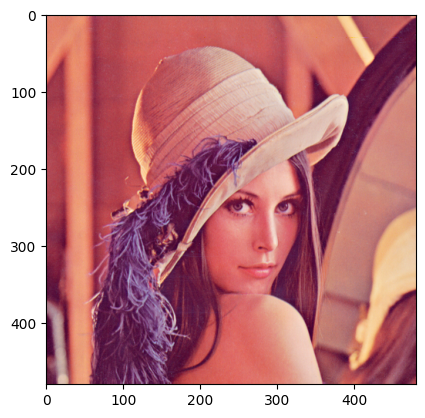

In [6]:
Lenna_rgb = mpimg.imread('Lenna.png')
plt.imshow(Lenna_rgb)
#imagem original
plt.show()

In [7]:
Lenna_rgb.shape

(480, 480, 3)

In [8]:
# Ultima coluna define vermelho, verde, azul
Red = Lenna_rgb[:,:,0]
Green = Lenna_rgb[:,:,1]
Blue = Lenna_rgb[:,:,2]

In [9]:
# Transformacao linear descrita em https://e2eml.school/convert_rgb_to_grayscale
Lenna_cinza = np.zeros((480,480))

for i in range(480):
  for j in range(480):
    Lenna_cinza[i][j] = 0.299*Red[i,j] + 0.587*Green[i,j] + 0.114*Blue[i,j]

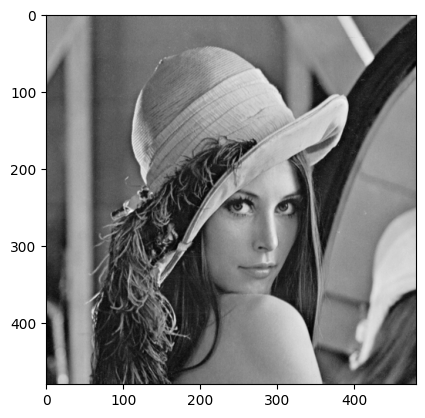

In [10]:
plt.imshow(Lenna_cinza, cmap=plt.get_cmap('gray'))
#imagem escala cinza
plt.show()

In [11]:
# Criando uma escala com 256 valores de cinza
escala_cinza = np.linspace(0, 1, 256)

In [12]:
# Convertendo os valores para os presentes na escala
Lenna_cinza256 = np.zeros((480,480))

for i in range(480):
  for j in range(480):
    Lenna_cinza256[i][j] = escala_cinza[np.argmin(np.abs(escala_cinza - Lenna_cinza[i,j]))]

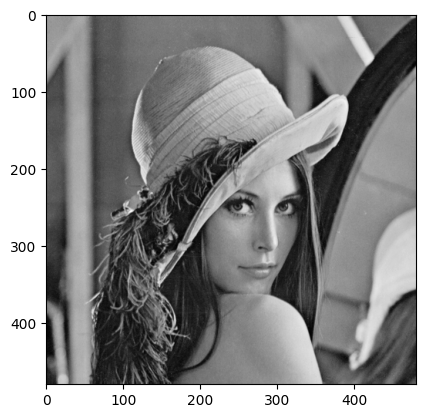

In [13]:
plt.imshow(Lenna_cinza256, cmap=plt.get_cmap('gray'))
#imagem escala cinza
plt.show()

In [14]:
"""
Os valores estão entre 0 e 1. Convertendo para binário: Se < 0,5 colocamos 0 e
se >= 0.5 colocamos 1.
"""
Lenna_bw = np.zeros((480,480))

for i in range(480):
  for j in range(480):
    if Lenna_cinza[i,j] >= 0.5:
      Lenna_bw[i,j] = 1.0
      #como definimos inicialmente Lenna_bw = 0, não precisamos usar a outra condição

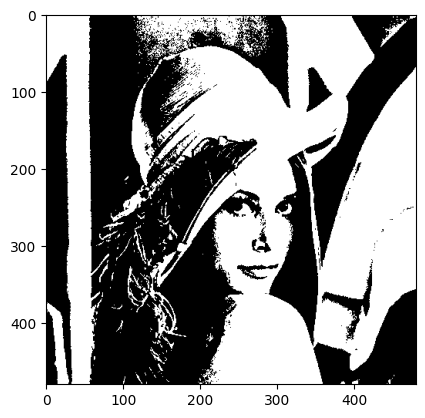

In [15]:
plt.imshow(Lenna_bw, cmap=plt.get_cmap('gray'))
#imagem preto e branco
plt.show()